## Python statistics essential training - 05_06_bayesian

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [6]:
import pymc3 as pm # package for bayes theorem

### Bayes' Theorem

![bayes-theorem](bayes_theorem.png)

In [8]:
n = 100
k = 61

with pm.Model() as coin_context:
    p = pm.Uniform('p',0.40,0.80)
    
    y = pm.Binomial('y', n=n,p=p, observed=k)
    
    trace = pm.sample(10000)

/Users/kevinkwasnik/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 21 seconds.


In [9]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/kevinkwasnik/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.608,0.048,0.519,0.697,0.0,0.0,16516.0,25124.0,1.0


/var/folders/92/fmsgf0056l97n6qst76j75sm0000gp/T/ipykernel_8647/4255668653.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/kevinkwasnik/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

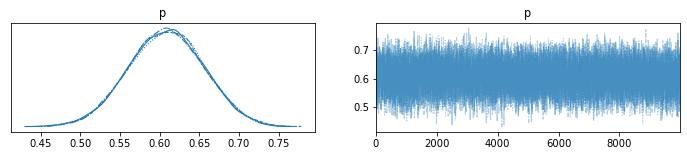

In [10]:
pm.traceplot(trace)

In [11]:
gdata = pd.read_csv('gapminder.csv').query('year == 1985')

In [12]:
gdata.sort_values('age5_surviving', inplace=True)

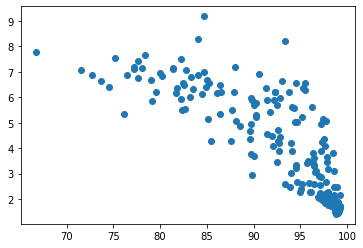

In [13]:
plt.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])

In [16]:
with pm.Model() as gapminder_context:
    intercept = pm.Uniform('intercept',5,15)
    slope = pm.Uniform('slope',-1,1)
    
    babies = pm.Normal(
        'babies',
        mu = intercept + slope * (gdata['age5_surviving'] - 65),
        sd = 1,
        observed = gdata['babies_per_woman']
    )
    trace = pm.sample(10000)

/Users/kevinkwasnik/opt/anaconda3/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 23 seconds.
The acceptance probability does not match the target. It is 0.8940464842284457, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8830410363697673, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [17]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/kevinkwasnik/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,10.198,0.28,9.660,10.707,0.003,0.002,7186.0,9114.0,1.0
slope,-0.219,0.01,-0.239,-0.201,0.000,0.000,7219.0,8957.0,1.0


/var/folders/92/fmsgf0056l97n6qst76j75sm0000gp/T/ipykernel_8647/4255668653.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/kevinkwasnik/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>],
       [<AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'slope'}>]], dtype=object)

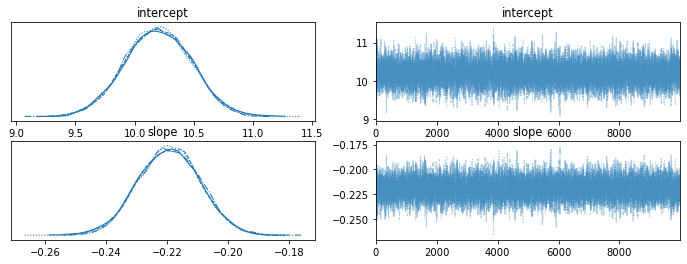

In [18]:
pm.traceplot(trace)

In [19]:
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving'] - 65)

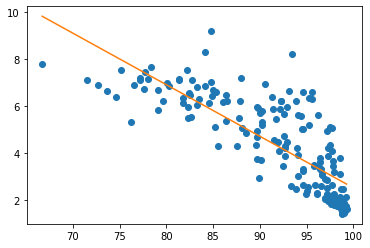

In [21]:
plt.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])
plt.plot(gdata['age5_surviving'], babies,'C1')

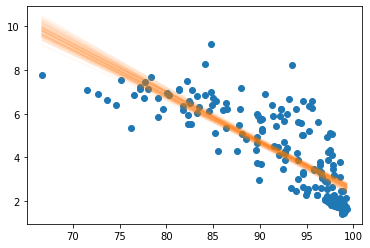

In [24]:
plt.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])

for i, intercept, slope in zip(range(100), trace['intercept'][::50], trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving'] - 65)
    
    plt.plot(gdata['age5_surviving'], babies,'C1', alpha = 0.05)